In [35]:
import numpy as np
import pandas as pd
import re  # regular expression
from nltk.corpus import stopwords #corpus=> body of the text, stopwords=> words that doesn't add too much value for the text
from nltk.stem.porter import PorterStemmer # stem -> takes a word and remove prefix and sufix of the word and returns the root word
from sklearn.feature_extraction.text import TfidfVectorizer  #TfidfVectorizer=> convert text into feature vectors (numbers)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('English')) # these words do not put huge value in out dataset, so have to remove

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Data Collection

In [4]:
# loading dataset to pandas dataframe [dataframe provide more structured table]
news_dataset = pd.read_csv('FakeNewsDataset.csv')

In [5]:
news_dataset.shape # (rows,col)

(20800, 5)

In [6]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
# counting the no.of missing value in dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

### Data pre-processing

In [8]:
# replacing missing value with empty sring. (as our dataset contain 20800 rows but few rows have missing value)
news_dataset= news_dataset.fillna('')

In [9]:
# counting the no.of missing value in dataset
news_dataset.isnull().sum() 

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
# using title and author for the prediction
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [11]:
news_dataset.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [12]:
print(news_dataset['content'].head())

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: content, dtype: object


In [13]:
# seperating the data and label
X = news_dataset.drop(columns='label', axis=1) #axis=1 for col and axis=0 for row
Y = news_dataset['label']

In [14]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [15]:
port_stem = PorterStemmer()

In [16]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [17]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [18]:

print(news_dataset['content'])


0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [19]:
# seperating data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [20]:
print(X)
print(Y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]


In [21]:
X.shape

(20800,)

In [22]:
Y.shape

(20800,)

In [23]:
# converting textual data to numerical data
vectorizer = TfidfVectorizer() # Tf = term frequency (Measures how frequently a term appears in a document. The more frequently a term appears, the higher its TF value.), idf = inverse documentary frequency (Measures how important a term is by reducing the weight of terms that appear in many documents across the corpus. It gives higher importance to terms that are unique or less common across documents.)
vectorizer.fit(X)

X = vectorizer.transform(X) # Converts the text data in X into a matrix of TF-IDF features

In [24]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [25]:
# spliting data set to training and test data
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
# stratify=Y: This ensures that the proportion of each class (e.g., real vs. fake news) in the training and test sets is the same as in the original dataset.
# It helps maintain the class distribution in both training and test sets, which is important for balanced model training and evaluation.

### Using Logistic Regression Model

<img src="LogisticRegressionImg.jpg" alt="Alt Text" width="600"/>

<p style="color:red">If Threshold Value is > 0.5 then 1 else 0</p>
<p><span style="color:green">X</span> -> <span style="color:blue">Input Features</span> <span style="color:green">Y</span> -> <span style="color:blue">Prediction Probability</span> <span style="color:green"> w</span> -> <span style="color:blue">weights<span> <span style="color:green"> b</span> -> <span style="color:blue">biases<span> </p>

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, Y_train)

LogisticRegression()

#### Accuracy score

In [28]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train) # prediction on X_train data is done and its output is stored
training_data_accuracy = accuracy_score(X_train_prediction,Y_train) # comparing predictions (X_train_prediction) with actual labels (Y_train)

In [29]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [30]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


## Making a Predictive System

In [32]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [33]:
print(Y_test[3])

0


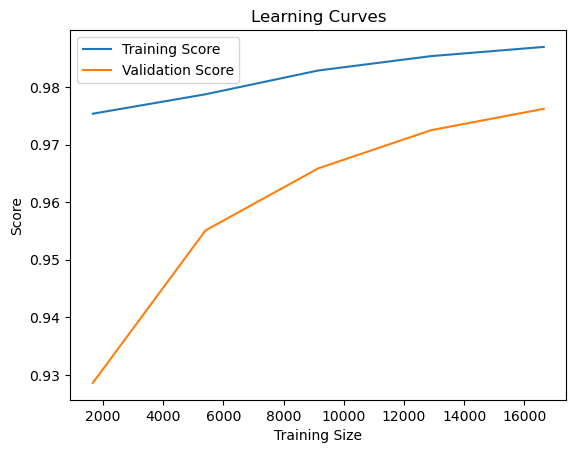

In [36]:
# Plot
train_sizes, train_scores, validation_scores = learning_curve(model, X, Y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()
